<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Semanal Nº2
#### Lucas Douat

## Introduccion
En esta práctica trabajamos con la síntesis de señales digitales (generación) utilizando Python, abordando aspectos fundamentales del procesamiento de señales como la creación, modificación y análisis de formas de onda. Se generarán señales sinusoidales, cuadradas y pulsos rectangulares, aplicando transformaciones en amplitud, desfases y conceptos de modulación, incluyendo recortes de amplitud.

Para cada señal se indicarán parámetros clave como el tiempo entre muestras, el número total de muestras, y la energía o potencia, según corresponda.

Además, se verificará la ortogonalidad entre señales, lo cual permite evaluar el grado de independencia entre ellas. Este análisis se realizará mediante el producto interno entre dos señales discretas:

$$ \langle x, y \rangle = \sum_{k=1}^{N} x[k]\cdot y[k] $$

También se estudiará la autocorrelación de una señal y su correlación cruzada con el resto de las señales generadas, lo que permitirá analizar similitudes temporales y relaciones entre las formas de onda trabajadas.


## Analisis y Desarrollo

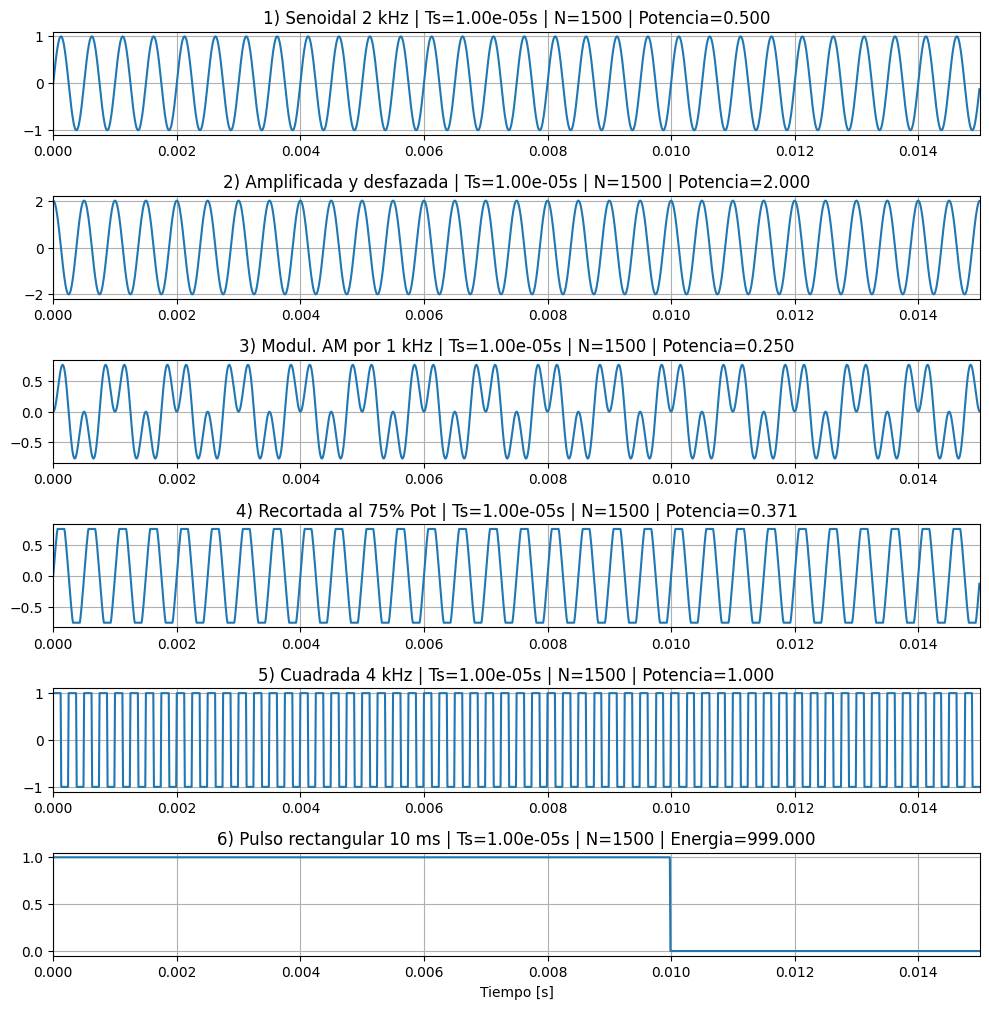

In [12]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on ...

@author: Lucas Douat

Descripción:
------------
Tarea Semanal N°1 - Síntesis de señales
"""

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.signal import square

#%%  Definicion de Funciones
def signal_pot(x):
    return np.mean(x**2)
    
def signal_energy(x):
    return np.sum(x**2)
    
#%% 1) Sintetizar y graficar:
fs = 100000  # frecuencia de muestreo en Hz
Ts = 1 / fs  # tiempo entre muestras
N = 1500     # número de muestras
tt = np.linspace(0, (N-1)*Ts, N).flatten() # vector de tiempo
"""
fs: frecuencia de muestreo 100 kHz.
Ts: tiempo entre muestras, calculado como el inverso de fs.
N: cantidad total de muestras.
tt: vector de tiempo, desde 0 hasta (N-1)*Ts.
"""
#Señal 1: Senoidal de 2 kHz
f1 = 2000
x1 = np.sin(2 * np.pi * f1 * tt)


#Señal 2: Amplificada y desfazada
x2 = 2 * np.sin(2 * np.pi * f1 * tt + np.pi/2)
"""
Misma señal que x1, pero:
amplitud duplicada (×2)
fase desplazada en pi/2 radianes
"""

#Señal 3: Modulada en amplitud
f_mod = 1000
modulador = np.sin(2 * np.pi * f_mod * tt)
x3 = x1 * modulador

"""Se genera una señal senoidal de 1 kHz (modulador)
Se usa como envolvente para modular la amplitud de x1
Esto simula una modulación AM (amplitud modulada)"""

#Señal 4: Recortada al 75% de la amplitud
x4 = np.clip(x1, -0.75,0.75)

# Señal 5: Cuadrada de 4 kHz
f5 = 4000
x5 = square(2 * np.pi * f5 * tt)


# Señal 6: Pulso rectangular de 10 ms
N_pulso = int(0.01/Ts)
x6 = np.zeros(N)
x6[:N_pulso] = 1

# Graficar todas las señales
fig, axs = plt.subplots(6, 1, figsize=(10, 10))
axs[0].plot(tt, x1)
axs[0].set_title(f"1) Senoidal 2 kHz | Ts={Ts:.2e}s | N={N} | Potencia={signal_pot(x1):.3f}")

axs[1].plot(tt, x2)
axs[1].set_title(f"2) Amplificada y desfazada | Ts={Ts:.2e}s | N={N} | Potencia={signal_pot(x2):.3f}")

axs[2].plot(tt, x3)
axs[2].set_title(f"3) Modul. AM por 1 kHz | Ts={Ts:.2e}s | N={N} | Potencia={signal_pot(x3):.3f}")

axs[3].plot(tt, x4)
axs[3].set_title(f"4) Recortada al 75% Pot | Ts={Ts:.2e}s | N={N} | Potencia={signal_pot(x4):.3f}")

axs[4].plot(tt, x5)
axs[4].set_title(f"5) Cuadrada 4 kHz | Ts={Ts:.2e}s | N={N} | Potencia={signal_pot(x5):.3f}")

axs[5].plot(tt, x6)
axs[5].set_title(f"6) Pulso rectangular 10 ms | Ts={Ts:.2e}s | N={N} | Energia={signal_energy(x6):.3f}")

for ax in axs:
    ax.set_xlim([0, N*Ts])
    ax.grid(True)

plt.tight_layout()
plt.xlabel("Tiempo [s]")
plt.show()


## Potencia y Energía 

Para hablar de energía debemos tener en cuenta si nuestra señal es de duración finita, como en el caso del pulso rectangular de 10 ms (x6). En estos casos, se analiza la energía total, que se calcula como:

$$E = \sum_{k=1}^{N} |x[k]|^2$$

En cambio, si la señal es periódica o de duración infinita (como las senoidales, la señal cuadrada o la señal modulada), se analiza la potencia promedio, definida como:

$$P = \frac{1}{N} \sum_{k=1}^{N} |x[k]|^2$$

Es importante aclarar que, en la práctica, trabajamos con una cantidad finita de muestras, por lo tanto podemos calcular ambas métricas sobre el mismo conjunto de datos. Sin embargo, es fundamental tener en cuenta la naturaleza de la señal para interpretar correctamente si corresponde hablar de potencia o energía.

In [13]:
#%% 2) ortogonalidad entre la primera señal y las demás.

# Lista de señales y etiquetas
señales = [x2, x3, x4, x5, x6]
labels = ['x2', 'x3', 'x4', 'x5', 'x6']

# Función para calcular producto interno de x1 y las demas señales
def ortogonalidad(x1, señales):
    resultado = []
    for i, xi in enumerate(señales):
        producto_int = np.dot(x1, xi)
        resultado.append((labels[i], producto_int))
    return resultado

# Calcular ortogonalidad
resultado = ortogonalidad(x1, señales)

# Mostrar resultados
for label, dot in resultado:
    print(f"Producto interno entre x1 y {label}: {dot:.2f}")

Producto interno entre x1 y x2: 0.00
Producto interno entre x1 y x3: -0.00
Producto interno entre x1 y x4: 641.70
Producto interno entre x1 y x5: -0.00
Producto interno entre x1 y x6: 0.13


### Cálculo de ortogonalidad

La ortogonalidad entre señales se evaluó mediante el **producto interno**:

$$\langle x_1, x_i \rangle = \sum_{k} x_1[k] \cdot x_i[k]$$

Si el resultado es cero (o cercano), las señales son ortogonales. Esto indica que no comparten componentes comunes en el espacio vectorial.

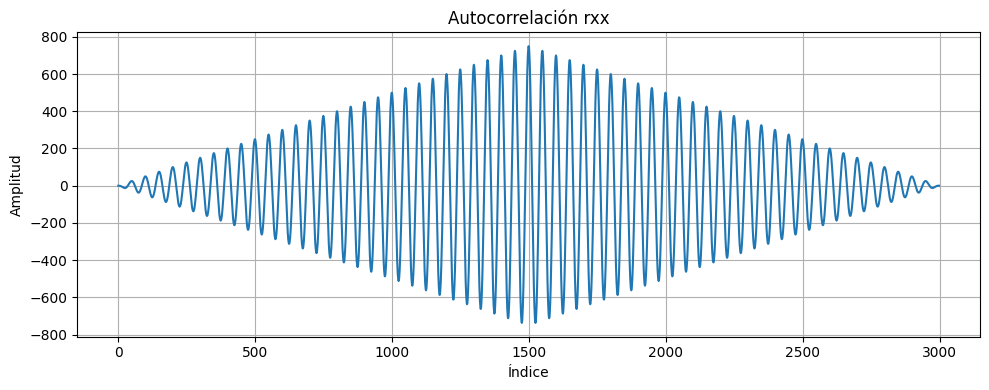

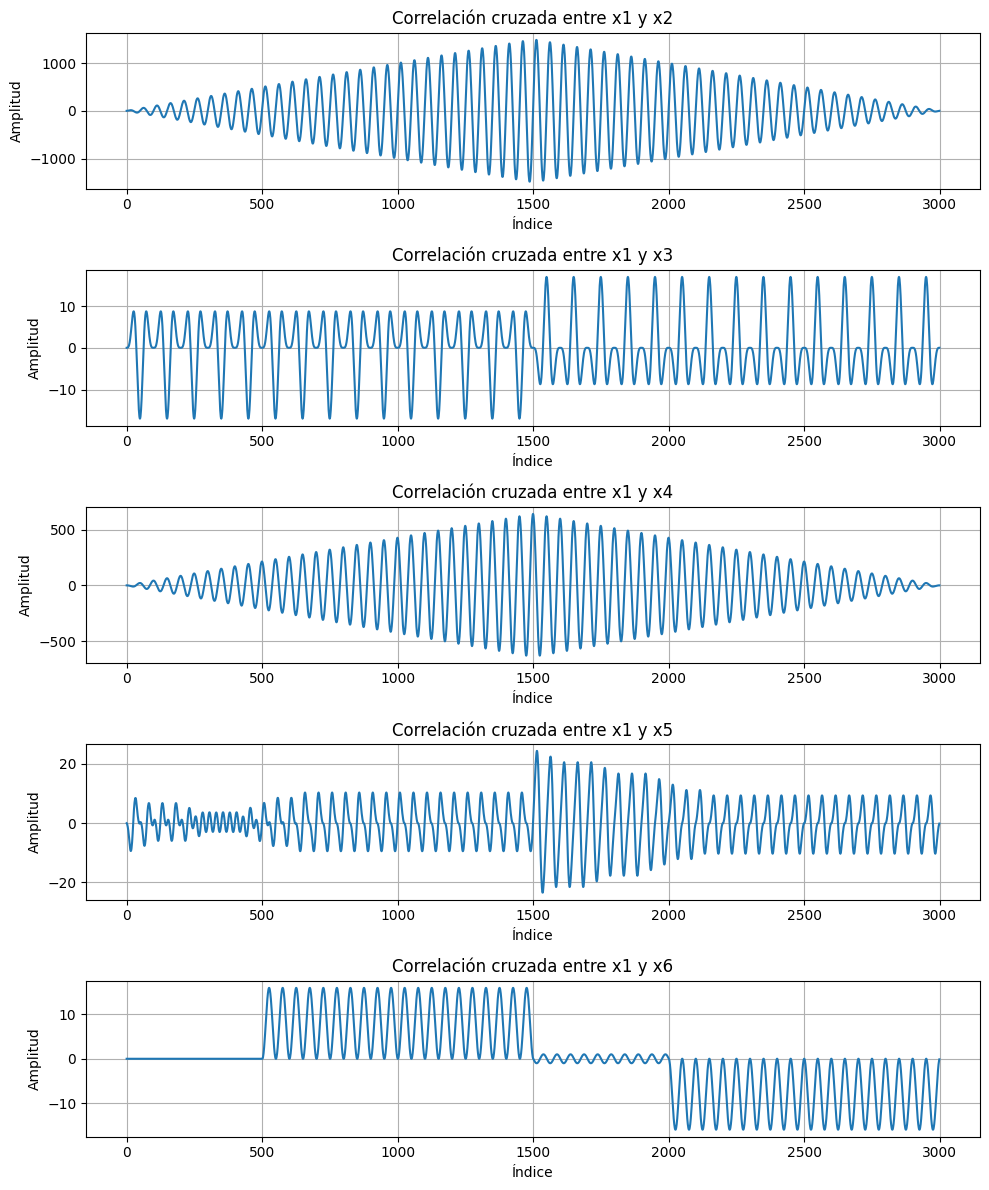

In [20]:
#%% 3) Graficar la autocorrelación de la primera señal y la correlación entre ésta y las demás.

# Autocorrelación de x1 (Clase 21-08)
rxx = sig.correlate(x1, x1)

plt.figure("Autocorrelación rxx", figsize=(10,4))
plt.plot(rxx)
plt.title("Autocorrelación rxx")
plt.xlabel("Índice")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()

# Función para calcular correlación cruzada con un grupo de señales
def correlacion(x1, señales):
    resultado = []
    for i, xi in enumerate(señales):
        xxi = sig.correlate(x1, xi)
        resultado.append((labels[i], xxi))
    return resultado

# Calcular correlaciones cruzadas
resultado = correlacion(x1, señales)

# Graficar correlaciones cruzadas
fig, axs = plt.subplots(5, 1, figsize=(10, 12))
for i, (label, corr) in enumerate(resultado):
    axs[i].plot(corr)
    axs[i].set_title(f"Correlación cruzada entre x1 y {label}")
    axs[i].set_xlabel("Índice")
    axs[i].set_ylabel("Amplitud")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

### Cálculo de correlación

Para comparar señales, se utilizó la correlación cruzada, definida como:

$$r_{xy}[n] = \sum_{k} x[k] \cdot y[k+n]$$

Esta operación mide la similitud entre dos señales en función del desplazamiento \( n \). Se implementó con `scipy.signal.correlate`, y se graficaron los resultados para visualizar coincidencias temporales entre señales.



## A partir de la siguiente propiedad trigonometrica

$$2 \cdot \sin(\alpha) \cdot \sin(\beta) = \cos(\alpha - \beta) - \cos(\alpha + \beta)$$

**Objetivos:**
- Demostrar la igualdad usando las expresioens de euler
- Verificar que se cumple con señales sinusoidales, tomando \( \alpha = \omega t \) y \( \


In [15]:
from IPython.display import IFrame
IFrame("./TS1_Punto4.pdf", width=1000, height=1000)

## Conclusiones

Durante el trabajo implementé distintas señales en Python, analizando parámetros como frecuencia, período de muestreo, cantidad de muestras, potencia y energía. Esto permitió vincular la teoría con la simulación digital y observar cómo se comportan las señales en el dominio discreto.

En el análisis de ortogonalidad, observé que la Señal 2 (desfasada 90° respecto a la Señal 1) cumple con la condición teórica de ortogonalidad, ya que el producto interno dio exactamente cero. Esto confirma que ambas señales son ortogonales bajo las condiciones de muestreo utilizadas. Las demás señales mostraron baja correlación con la Señal 1, como era esperable por sus diferencias en forma, fase o contenido espectral.

La autocorrelación de la Señal 1 confirmó su coherencia interna, mostrando simetría y periodicidad. Las correlaciones cruzadas con las demás evidenciaron menor similitud, reforzando el análisis de ortogonalidad y permitiendo visualizar cómo varía la coincidencia entre señales según su forma.

En síntesis, el trabajo permitió aplicar y consolidar conceptos clave como muestreo, potencia, energía, correlación, ortogonalidad y propiedades trigonométricas, reforzando la comprensión de señales en entornos digitales.


## Autoevaluación del aprendizaje

Durante el desarrollo del trabajo logré afianzar conceptos fundamentales de la materia y mejorar mi manejo de herramientas de simulación y análisis requeridas para el curso:

- Comprendí cómo aplicar el producto interno para evaluar ortogonalidad entre señales, y cómo interpretar sus resultados.
- Aprendí a calcular y graficar la correlación cruzada, entendiendo su utilidad para comparar señales en distintos desplazamientos temporales.
- Reforcé la diferencia entre potencia y energía, y entendí en qué casos corresponde usar cada una según el tipo de señal.
- Experimenté con distintos tipos de señales y observé cómo se comportan en simulaciones digitales, reforzando la relación entre teoría y práctica.

Además, este trabajo me permitió afianzar la modalidad de trabajo con herramientas como Spyder y Jupyter Notebook, comprendiendo mejor su funcionamiento. Aprendí a debuggear observando el comportamiento de variables en tiempo real, y a utilizar las herramientas de inspección que ofrece el entorno para detectar errores y ajustar el código.

Utilicé Copilot como apoyo para:
- Consultar conceptos teóricos relacionados con señales, correlación y ortogonalidad.
- Interpretar gráficos y resultados obtenidos en las simulaciones.
- Resolver dudas sobre cómo implementar cálculos y visualizaciones en Python de forma adecuada.
- Validar cómo se escriben correctamente las fórmulas matemáticas en LaTeX, ya que no tenía conocimientos previos sobre su sintaxis.